# **Laboratorio de Machine Learning**
# ***ANÁLISIS DE DATOS***

# <font color=blue>**Desafío 02**</font>

# <font color=blue>**LIBRERIAS**


In [4]:
# Importamos la libreria pandas con sobrenombre pd
import pandas as pd

# <font color=blue>**PARTE 1**
    
<font color=darkred>**Importar el dataset/dataframe surveys.csv**

## Presentacion de los Datos
Para este desafio, utilizaremos los datos de "Portal Teaching", que son un subconjunto de los datos estudiados por Ernst et para el [Monitoreo a largo plazo y la manipulación experimental de un ecosistema del desierto de Chihuahua cerca de Portal, Arizona, EE](http://www.esapubs.org/archive/ecol/E090/118/default.htm)
Esta base de datos proporciona un ejemplo del mundo real de la historia de vida, la poblacion y los datos ecologicos,con la complejidad suficiente para enseñar muchos aspectos del análisis y la gestión de datos.

Se realizo un estudio de las especies y el peso de los animales capturados en las parcelas de nuestra area de estudio. El conjunto de datos se almacena como un archivo `.csv`: cada fila contiene información para un solo animal y las columnas representan la siguiente informacion:

| Columna           | Descrpción                        |
|------------------|------------------------------------|
| record_id       | identificador unico de la observacion      |
| month            | mes de observación               |
| day              | dia de la observacion                 |
| year             | año de la observación                |
| plot_id           | ID de un sitio en particular            |
| species_id       | codigo de dos letras                      |
| sex              | sexo del animal (“M”, “F”)           |
| hindfoot_length  | tamaño de las patas en mm
| weight           | peso del animal en gramos     |


## Lectura de los datos surveys.csv usando Pandas

In [5]:
# Leemos los datos en CSV usando Pandas usando pd.read_csv
df = pd.read_csv("surveys.csv")
df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


**Como podemos observar se analizaron 35 549 filas y cada fila tiene 9 columnas. La primera columna es el índice del DataFrame usado para identificar la posición de los datos, pero no es una columna real del DataFrame**

## Manipulación de los datos

### <font color=darkred>**Las columnas/variables/características que tipo de datos tienen?**
    
Para saber cuales son los tipos de datos  de las variable en un DataFrame usamos el atributo `dtypes` en nuestro indicador. `int64` representa valores numéricos es decir las celdas no pueden almacenar decimales. `object` representa cadenas (letras y números). `float64` Representa números con decimales.

In [2]:
df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

### <font color=darkred>**Análice si existen datos faltantes**

Los datos que faltan estan representados por dos valores en Pandas 
* None: Es un objeto único de Python que a menudo se usa para datos faltantes en el código de Python.
* NaN: Un acrónimo de Not a Number, es un valor especial de punto flotante reconocido por todos los sistemas que utilizan la representación estándar de punto flotante IEEE
---
#### Comprobación de valores faltantes usando isnull() y notnull()
Para verificar los valores faltantes en Pandas DataFrame, usamos una función isnull() y notnull(). Ambas funciones ayudan a verificar si un valor es NaN o no. 

`isnull()`
: Esta funcion devuelve un DataFrame de valores booleanos que son verdaderos para los valores NaN 

Usamos la funcion `.sum()` para sumar los valores con NaN

A continuacion se muestra el numero de datos faltantes para cada columna 

In [3]:
df.isnull().sum()

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
dtype: int64

Como se muestra en el resultado. Si existen Datos Faltantes y estan en las siguienets columnas:
* Existen 763 datos faltantes para el ID de las especies
* Existen 2511 datos faltantes para el sexo de los animales
* Existen 4111 datos faltantes para el tamaño de las patas
* Existen 3266 datos faltantes para el peso

Otra forma de verificar valores faltantes, es verificar datos no nulos

`notnull()`: Esta función devuelve un DatFrame de valores booleanos que son falsos para los valores NaN

A continuacion se muestra el numero de datos no nulos para cada columna  

In [4]:
df.notnull().sum()

record_id          35549
month              35549
day                35549
year               35549
plot_id            35549
species_id         34786
sex                33038
hindfoot_length    31438
weight             32283
dtype: int64

Como el numero de daros no nulos del ID de las especies, el sexo de las especies, el tamaño de las patas y el peso son diferentes de 35549 el cual es el total podemos concluir que lso datos estan faltando 

### Analisis de la variable species_id

In [44]:
df['species_id'].describe()

count     34786
unique       48
top          DM
freq      10596
Name: species_id, dtype: object

A continuacion se reliaza un conteo del numero de muestras para cada especie. Usando el metodo `.groupby` podemos agrupar los datos por `species_id` resultando un dataFrame con una sola varable `record_id`. y luego contamos el numero de datos por especie con  `.count()`.

In [6]:
# contar el número de muestras por especie
muestras_especie = df.groupby('species_id')['record_id'].count()

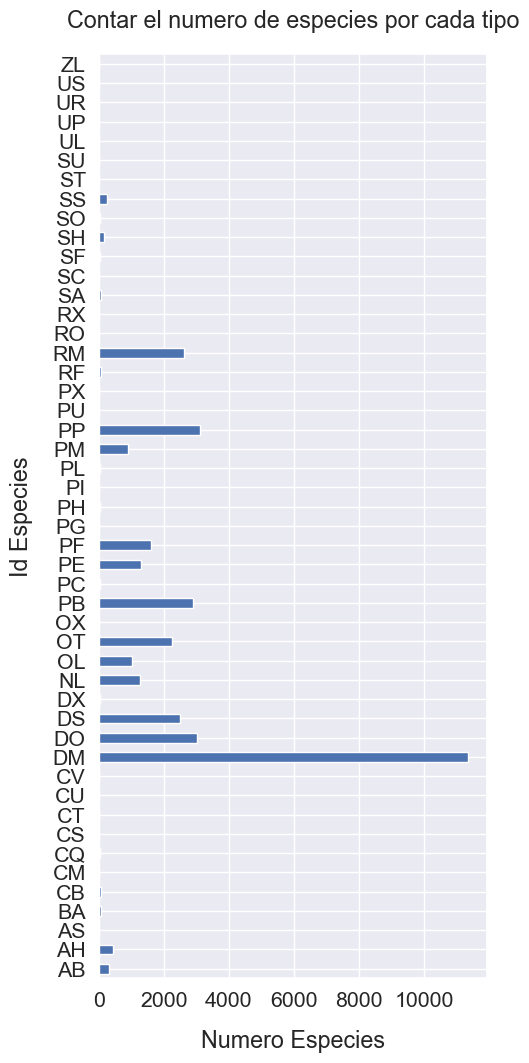

In [75]:
#asegúrese de que las figuras aparezcan en línea en Ipython Notebook
%matplotlib inline
# creamos un diagrama de barras
muestras_especie.plot(kind='barh', figsize=(5, 12));
plt.xlabel("Numero Especies", labelpad=14)
plt.ylabel("Id Especies", labelpad=14)
plt.title("Contar el numero de especies por cada tipo", y=1.02);

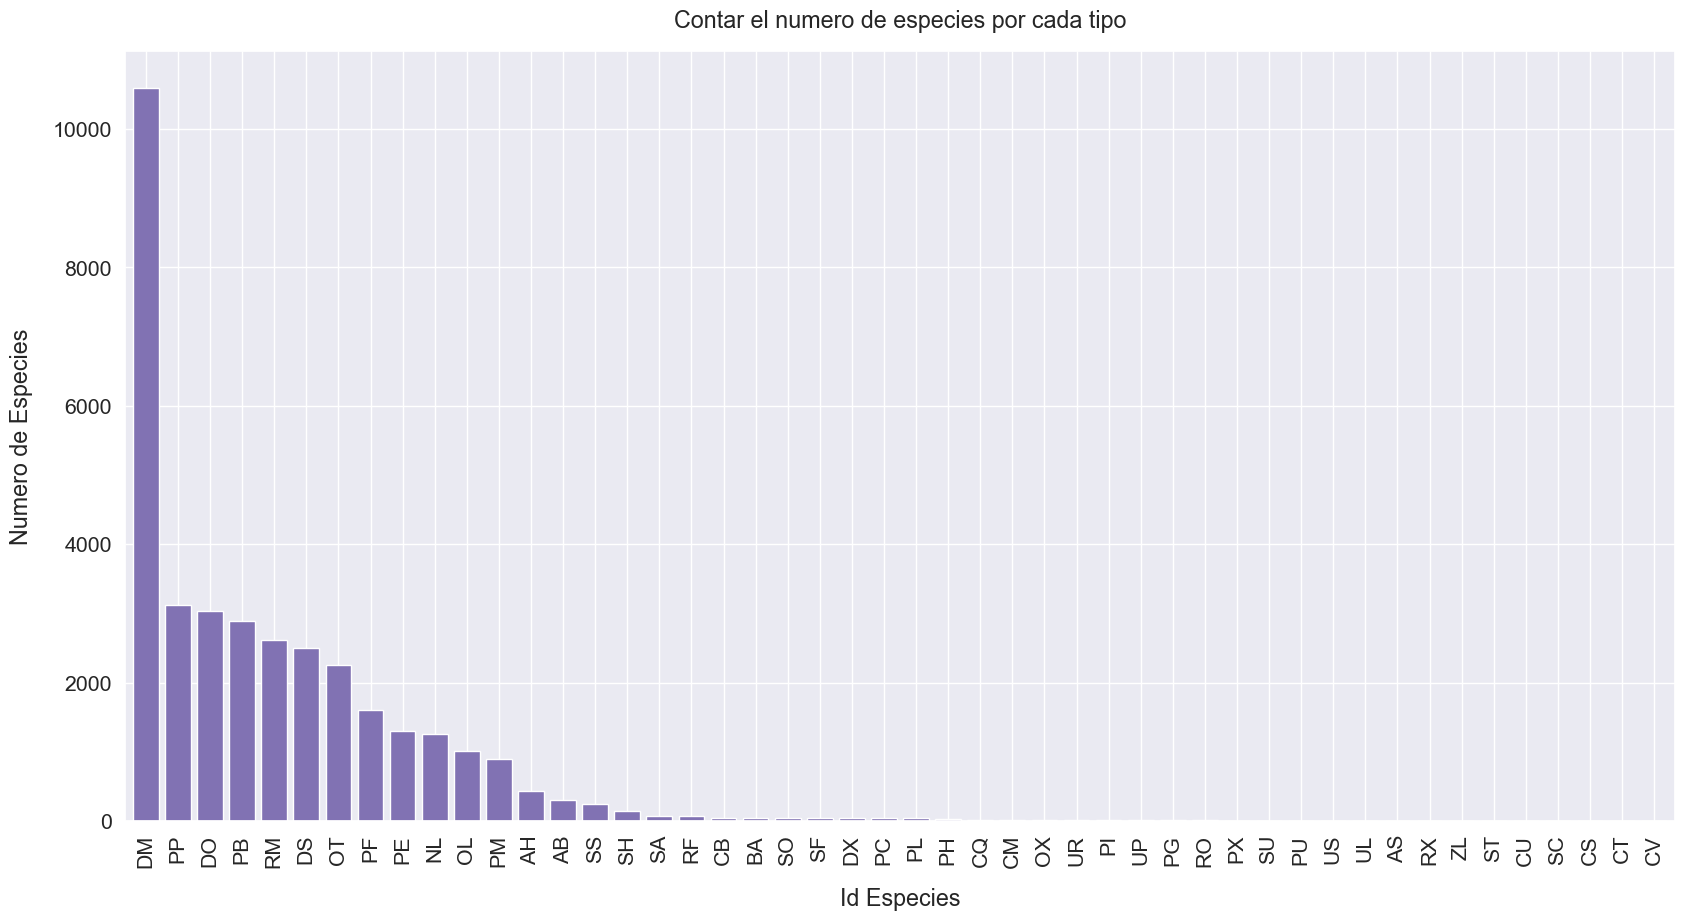

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
df['species_id'].value_counts().plot(kind='bar',
                                     width=0.8, 
                                     figsize=(20, 10),
                                    color ='m');
plt.xlabel("Id Especies", labelpad=14)
plt.ylabel("Numero de Especies", labelpad=14)
plt.title("Contar el numero de especies por cada tipo", y=1.02);

Como observamos el tipo de especie DM tiene una frecuencia muy alta en comparacion con los demas en mas del 50 %  

### Analisis de la variable sex

In [55]:
df['sex'].describe()

count     33038
unique        2
top           M
freq      17348
Name: sex, dtype: object

In [61]:
# contar el número de muestras por especie
muestras_especie = df.groupby('sex')['record_id'].count()
muestras_especie

sex
F    15690
M    17348
Name: record_id, dtype: int64

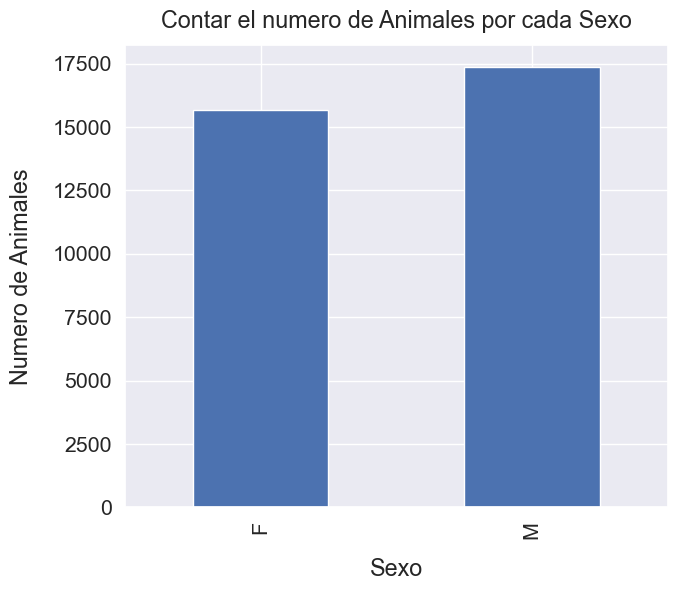

In [64]:
#asegúrese de que las figuras aparezcan en línea en Ipython Notebook
%matplotlib inline
# create a quick bar chart
muestras_especie.plot(kind='bar', figsize=(7, 6));
plt.xlabel("Sexo", labelpad=14)
plt.ylabel("Numero de Animales", labelpad=14)
plt.title("Contar el numero de Animales por cada Sexo", y=1.02);

### Analisis de la variable  hindfoot_length   


In [65]:
df['hindfoot_length'].describe()

count    31438.000000
mean        29.287932
std          9.564759
min          2.000000
25%         21.000000
50%         32.000000
75%         36.000000
max         70.000000
Name: hindfoot_length, dtype: float64

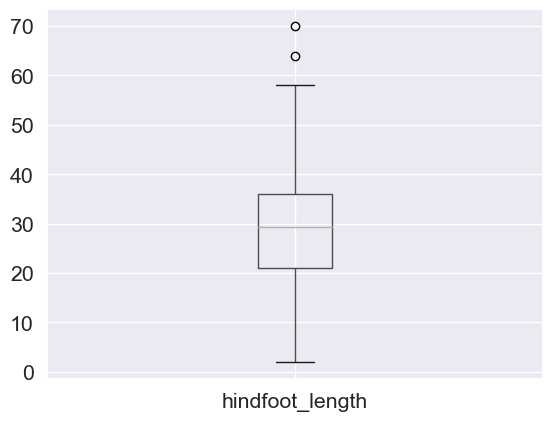

In [76]:
boxplot = df.boxplot(column=['hindfoot_length'])  

* La linea central de la caja indica la mediana de los datos es aproximadamente 30
* Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75-> 21 y 36 respectivamente
* Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza, los Outliers  de los datos. desde 58 hasta 70 

### Analisis de la variable  weight   


In [66]:
df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

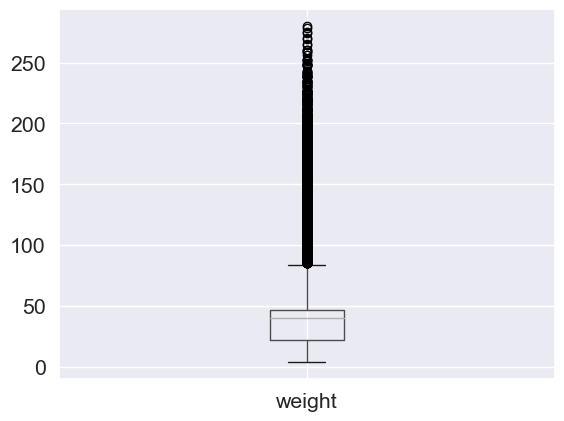

In [78]:
boxplot = df.boxplot(column=['weight'])  

* La linea central de la caja indica la mediana de los datos es aproximadamente 42
* Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75-> 20 y 48 respectivamente
* Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza, los Outliers  de los datos. desde 57 hasta 280 

<font color=darkred >**Tome tres estrategias de imputacion de datos y muestre los resultados**

1 Imputacion Estrategia de imputar los datos numericos con la media y los valores categoricos con la moda de la variable usando la funcion fillna para realizar esta imputacion de manera sencilla.
* Primero para la columna `species_id` imputamos con el valor mas frecuente el cual es la especie DM 
* Segundo para la columna `sex` imputamos con el valor mas frecuente el cual es 
M
* Tercero para la columna `hindfoot_length` con el valor medio pero entero 29
* Cuarto para la columna `weight`con el valor promedio el cual es 42.67

In [70]:
# Imputamos las variables numericas con la media
df['hindfoot_length'].fillna(df['hindfoot_length'].mean(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)

# Imputamos la variables categoricas con la moda
df['species_id'].fillna(df['species_id'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.000000,42.672428
1,2,7,16,1977,3,NL,M,33.000000,42.672428
2,3,7,16,1977,2,DM,F,37.000000,42.672428
3,4,7,16,1977,7,DM,M,36.000000,42.672428
4,5,7,16,1977,3,DM,M,35.000000,42.672428
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,M,29.287932,42.672428
35545,35546,12,31,2002,15,AH,M,29.287932,42.672428
35546,35547,12,31,2002,10,RM,F,15.000000,14.000000
35547,35548,12,31,2002,7,DO,M,36.000000,51.000000


2 Imputacion de datos simple usando `fillna()`
* Primero para la columna `species_id` imputamos con el segundo valor mas frecuente el cual es la especie PP 
* Segundo para la columna `sex` imputamos con el valor mas frecuente el cual es 
M
* Tercero para la columna `hindfoot_length` con el valor medio el cula es 29.28
* Cuarto para la columna `weight`con el percentil 75 el cual es 48

In [79]:
values = {"species_id": 'PP', "sex": 'M', "hindfoot_length": 29.28, "weight": 48}
df.fillna(value=values)



,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.000000,42.672428
1,2,7,16,1977,3,NL,M,33.000000,42.672428
2,3,7,16,1977,2,DM,F,37.000000,42.672428
3,4,7,16,1977,7,DM,M,36.000000,42.672428
4,5,7,16,1977,3,DM,M,35.000000,42.672428
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,M,29.287932,42.672428
35545,35546,12,31,2002,15,AH,M,29.287932,42.672428
35546,35547,12,31,2002,10,RM,F,15.000000,14.000000
35547,35548,12,31,2002,7,DO,M,36.000000,51.000000


3. Estrategia Llenar valores faltantes con el modelo parametrico K-nearest neighbors
Donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los k vecinos u observaciones mas cercanos. Asimismo, para las variables categóricas, se utiliza las clase mayoritaria de entre los k mas cercanos.

La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses:


In [82]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["hindfoot_length"]])
df["hindfoot_length"] = imputer.transform(df[["hindfoot_length"]]).ravel()

print("Valores perdidos en hindfoot_length: " + 
      str(df['hindfoot_length'].isnull().sum()))

imputer.fit(df[["weight"]])
df["weight"] = imputer.transform(df[["weight"]]).ravel()

print("Valores perdidos en weight: " + 
      str(df['weight'].isnull().sum()))

Valores perdidos en hindfoot_length: 0
Valores perdidos en weight: 0


<font color=darkred> **¿Qué estrategia le parece la mejor y por qué?**

##### apunte su respuesta y expliquelo en la sustentación del desafio

La segunda estrategia que utilice creo que es la mejor porque es realizo al analisis estadistico 
puesto que los datos categoricos de la columna species_id nos e pueden convertir a float y analizando el diagram de barra
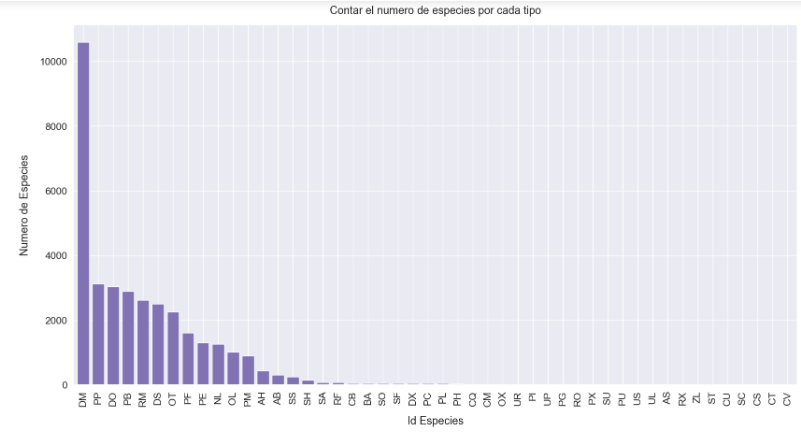
se puede ver que el tipo de especie DM es mucho mayo que los demas y esto puede llevar a valores atipicos por lo que considere al segundo mas frecuente.
La segunda columna categorica que se analizo fue del sexo 
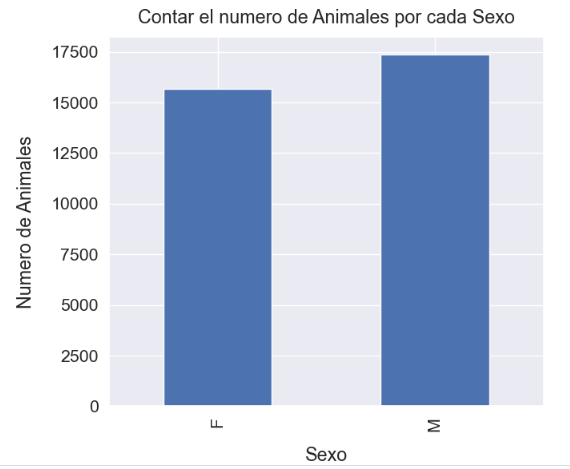
pero como la frecuencia de los dos tipos son similares opte por escoger el mayor
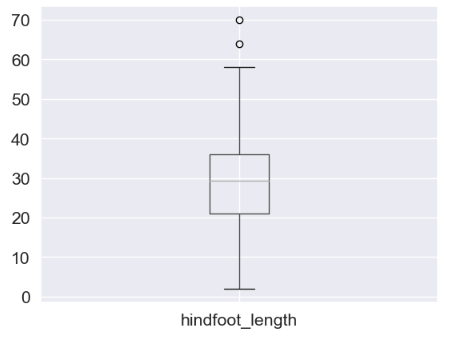
Las tercera columna analizada fue hindfoot_length, como se observa la caja presenta un comportamiento simetrico debido a que la media se encuentra a la mitad de la caja por lo que opte por escojer el promedio de los datos
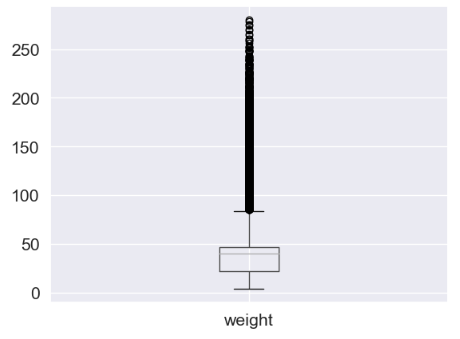
Y la ultima columna en analizar fue el weight, en esta se considero el percentil 75 debido a que presenta un alto grado de sesgo.


# <font color=blue>**PARTE 2**

<font color=darkgreen>Se tiene el conjunto de datos (dataframe) sobre niveles de contaminación de varias empresas en: **niveles_contaminacion_empresas.csv**

<font color=darkred>**Recupere el dataframe correspondientes.**

In [49]:
# Importamos la libreria pandas con sobrenombre pd
import pandas as pd
# Leemos los datos en CSV usando Pandas usando pd.read_csv
df = pd.read_csv("niveles_contaminacion_empresas.csv")
df


,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
0,0,945,629.0,1814.0,235,843.0,1836,14,5.0
1,588,1978,1842.0,5588.0,6850,NaN,11692,254,NaN
2,27,1028,752.0,22890.0,505,NaN,516,115,58.0
3,39,4527,3847.0,574973.0,8698,34132.0,3465,382,356.0
4,214,5063,3083.0,54592.0,2510,4845.0,3419,912,812.0
5,34,3360,NaN,33287.0,9505,11015.0,4741,264,137.0
6,42,19963,16177.0,190970.0,24171,158743.0,6202,1220,NaN
7,367,8207,4958.0,166476.0,1767,20578.0,1296,449,508.0
8,1569,1381,826.0,699.0,766,2217.0,21967,50,23.0
9,80,2971,NaN,27144.0,2930,6645.0,3156,157,166.0


**<font color=darkred> Siga la siguiente secuencia:**
1.   Muestre el dataframe y explique su contenido
2.   Verifique si existe datos faltantes
3.   Aplique dos estrategias por sentido común para 
     completar los datos faltantes
4.   Aplique dos estrategias estadísticas (determinísticas) 
     para imputar los datos faltantes





## 1. Muestre el dataframe y explique su contenido
Para este desafio, utilizaremos los datos de la "EMISION NACIONAL DE CONTAMINANTES, 2016 de la Dirección General de Gestión de la Calidad del Aire y RETC,[CONTAMINANTE](https://apps1.semarnat.gob.mx:8443/dgeia/indicadores19/conjuntob/indicador/archivos/pdf/01_atmosfera/calidad/indicadores/1.1-2.pdf)

Se realizo un estudio POR CATEGORIAS Fuentes fijas, Fuentes moviles, Fuentes de Area y Fuentes Naturales, etc. El conjunto de datos se almacena como un archivo `.csv`: cada fila contiene información para un solo fuente y las columnas representan la siguiente informacion:


| Columna           | Descrpción                        |
|------------------|------------------------------------|
| Numero_de_empresas       | El numero de empresas     |
| PM10            | Particulas iguales o menores a 10 micrometros               |
| PM2.5              | Particulas iguales o menores a 2.5 micrometros                 |
| SO2             | Dioxido de azufre                |
| CO           | monoxidod e carbono           |
| NOX       | oxido de nitrogeno                      |
| COV              | compuestos orgánicos volátiles           |
| NH3  | amoniaco|
| CN           | Carbon negro     |

### Manipulación de los datos
1. Tipo de Datos

In [50]:
df.dtypes

Numero_de_empresas      int64
PM10                    int64
PM2.5                 float64
SO2                   float64
CO                      int64
NOX                   float64
COV                     int64
NH3                     int64
CN                    float64
dtype: object

In [51]:
df.corr()


,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
Numero_de_empresas,1.000000,-0.047831,-0.115622,-0.205524,-0.047557,-0.149462,0.699720,-0.057645,-0.050698
PM10,-0.047831,1.000000,0.986435,0.334417,0.497477,0.551201,0.324047,0.848596,0.941967
PM2.5,-0.115622,0.986435,1.000000,0.362557,0.488133,0.648257,0.284755,0.784413,0.907911
SO2,-0.205524,0.334417,0.362557,1.000000,0.236111,0.415665,-0.084359,0.165632,0.168878
CO,-0.047557,0.497477,0.488133,0.236111,1.000000,0.289212,0.317857,0.503592,0.325451
NOX,-0.149462,0.551201,0.648257,0.415665,0.289212,1.000000,0.088950,0.256051,0.567153
COV,0.699720,0.324047,0.284755,-0.084359,0.317857,0.088950,1.000000,0.362364,0.277463
NH3,-0.057645,0.848596,0.784413,0.165632,0.503592,0.256051,0.362364,1.000000,0.913083
CN,-0.050698,0.941967,0.907911,0.168878,0.325451,0.567153,0.277463,0.913083,1.000000


## 2. Verificamos si existe datos faltantes


In [ ]:
df.isnull().sum()

Si existen 4 datos faltantes como se muestra en el resultado.y estan en las siguienets columnas:
* Existen 4 datos faltantes para las Particulas iguales o menores a 2.5 micrometros
* Existen 1 datos faltantes para Dioxido de Azufre
* Existen 8 datos faltantes para el oxido de nitrogeno
* Existen 8 datos faltantes Carbono negro


## 3.   Aplique dos estrategias por sentido común para  completar los datos faltantes


### Analisis de las columnas con datos Faltantes

In [53]:
df['PM2.5'].describe()

count       29.000000
mean      4909.482759
std       5258.749638
min        211.000000
25%       1769.000000
50%       3460.000000
75%       5838.000000
max      25779.000000
Name: PM2.5, dtype: float64

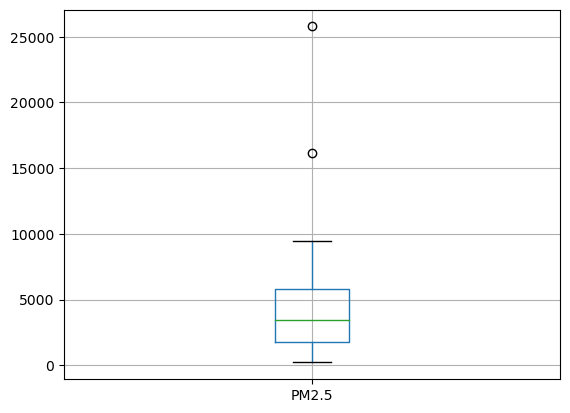

In [54]:
boxplot = df.boxplot(column=['PM2.5'])  

Segun a mi criterio como existen datos atipicos a partir de 10000 podriamos imputar con los datos dentro de los bigotes de la caja es decir dentro del percentil 25 y 50 lo mas conveninete desde 0 hasta 5000

In [55]:
df['SO2'].describe()

count        32.000000
mean      69570.406250
std      110163.166286
min         286.000000
25%        6469.250000
50%       30215.500000
75%       90694.500000
max      574973.000000
Name: SO2, dtype: float64

In [56]:
boxplot = df.boxplot(column=['SO2'])  

Segun a mi criterio como existen datos atipicos a partir de 200000 podriamos imputar con los datos dentro de los bigotes de la caja es decir dentro del percentil 25 y 50

In [57]:
df['NOX'].describe()

count        25.000000
mean      18707.280000
std       31415.400186
min         512.000000
25%        4845.000000
50%       10184.000000
75%       20578.000000
max      158743.000000
Name: NOX, dtype: float64

In [58]:
df['CN'].describe()

count      25.000000
mean      597.720000
std      1081.491467
min         5.000000
25%       171.000000
50%       356.000000
75%       508.000000
max      5608.000000
Name: CN, dtype: float64

In [59]:
boxplot = df.boxplot(column=['CN'])  

In [60]:
values = {"PM2.5": 5000, "SO2":69570.406250 ,"NOX":18707, "CN": 597.720000}
sentidocomun1 = df.fillna(value=values)

In [61]:
values = {"PM2.5": 5838, "SO2":90694 ,"NOX":20578, "CN": 508}
sentidocomun2 = df.fillna(value=values)

## 4.   Aplique dos estrategias estadísticas (determinísticas) para imputar los datos faltantes


In [62]:
# Imputamos las variables numericas con la maxima
maxima = df.fillna(df['PM2.5'].max())
maxima = df.fillna(df['SO2'].max())
maxima = df.fillna(df['NOX'].max())
maxima = df.fillna(df['CN'].max())


In [63]:
# Imputamos las variables numericas con la maxima
medio = df.fillna(df['PM2.5'].mean())
medio = df.fillna(df['SO2'].mean())
medio = df.fillna(df['NOX'].mean())
medio = df.fillna(df['CN'].mean())

**<font color=darkred>Utilizando la función  describe()  observe y compare los resultados obtenidos cuando se aplican al dataframe original y a los cuatro dataframe imputados.**

La explicación lo realiará en la sustentación y defensa del desafio.



In [64]:
# Compararmos con el sentido comun 1
sentidocomun1.describe()




,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,233.090909,6565.636364,4920.454545,69570.406250,19161.121212,18707.212121,8096.242424,896.424242,597.720000
std,346.377356,7711.727059,4919.201339,108428.204846,34131.505325,27206.534632,10278.400976,1474.116431,936.599084
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1842.000000,6763.000000,1325.000000,6335.000000,2885.000000,157.000000,259.000000
50%,129.000000,4556.000000,3847.000000,33287.000000,2930.000000,13328.000000,4093.000000,387.000000,451.000000
75%,222.000000,8207.000000,5399.000000,86202.000000,8698.000000,18707.000000,7567.000000,912.000000,597.720000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [65]:
df.describe()

,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,29.000000,32.000000,33.000000,25.000000,33.000000,33.000000,25.000000
mean,233.090909,6565.636364,4909.482759,69570.406250,19161.121212,18707.280000,8096.242424,896.424242,597.720000
std,346.377356,7711.727059,5258.749638,110163.166286,34131.505325,31415.400186,10278.400976,1474.116431,1081.491467
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1769.000000,6469.250000,1325.000000,4845.000000,2885.000000,157.000000,171.000000
50%,129.000000,4556.000000,3460.000000,30215.500000,2930.000000,10184.000000,4093.000000,387.000000,356.000000
75%,222.000000,8207.000000,5838.000000,90694.500000,8698.000000,20578.000000,7567.000000,912.000000,508.000000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [66]:
# Compararmos con el sentido comun 2
sentidocomun2.describe()


,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,233.090909,6565.636364,5022.030303,70210.515152,19161.121212,19160.787879,8096.242424,896.424242,575.969697
std,346.377356,7711.727059,4928.726715,108490.538788,34131.505325,27218.712836,10278.400976,1474.116431,937.412612
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1842.000000,6763.000000,1325.000000,6335.000000,2885.000000,157.000000,259.000000
50%,129.000000,4556.000000,3847.000000,33287.000000,2930.000000,13328.000000,4093.000000,387.000000,451.000000
75%,222.000000,8207.000000,5838.000000,90694.000000,8698.000000,20578.000000,7567.000000,912.000000,508.000000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [67]:
df.describe()

,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,29.000000,32.000000,33.000000,25.000000,33.000000,33.000000,25.000000
mean,233.090909,6565.636364,4909.482759,69570.406250,19161.121212,18707.280000,8096.242424,896.424242,597.720000
std,346.377356,7711.727059,5258.749638,110163.166286,34131.505325,31415.400186,10278.400976,1474.116431,1081.491467
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1769.000000,6469.250000,1325.000000,4845.000000,2885.000000,157.000000,171.000000
50%,129.000000,4556.000000,3460.000000,30215.500000,2930.000000,10184.000000,4093.000000,387.000000,356.000000
75%,222.000000,8207.000000,5838.000000,90694.500000,8698.000000,20578.000000,7567.000000,912.000000,508.000000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [68]:
# Compararmos con el estrategia estadistica del maximo
maxima.describe()


,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,233.090909,6565.636364,4994.151515,67632.151515,19161.121212,15531.696970,8096.242424,896.424242,1812.333333
std,346.377356,7711.727059,4924.554778,108998.399267,34131.505325,27797.371242,10278.400976,1474.116431,2373.089978
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1842.000000,5608.000000,1325.000000,5608.000000,2885.000000,157.000000,259.000000
50%,129.000000,4556.000000,3847.000000,27144.000000,2930.000000,6335.000000,4093.000000,387.000000,451.000000
75%,222.000000,8207.000000,5608.000000,86202.000000,8698.000000,13328.000000,7567.000000,912.000000,5608.000000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [69]:
df.describe()

,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,29.000000,32.000000,33.000000,25.000000,33.000000,33.000000,25.000000
mean,233.090909,6565.636364,4909.482759,69570.406250,19161.121212,18707.280000,8096.242424,896.424242,597.720000
std,346.377356,7711.727059,5258.749638,110163.166286,34131.505325,31415.400186,10278.400976,1474.116431,1081.491467
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1769.000000,6469.250000,1325.000000,4845.000000,2885.000000,157.000000,171.000000
50%,129.000000,4556.000000,3460.000000,30215.500000,2930.000000,10184.000000,4093.000000,387.000000,356.000000
75%,222.000000,8207.000000,5838.000000,90694.500000,8698.000000,20578.000000,7567.000000,912.000000,508.000000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000


In [70]:
medio.describe()


,Numero_de_empresas,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,233.090909,6565.636364,4386.844848,67480.324848,19161.121212,14317.083636,8096.242424,896.424242,597.720000
std,346.377356,7711.727059,5122.486478,109090.944330,34131.505325,28325.049627,10278.400976,1474.116431,936.599084
min,0.000000,40.000000,211.000000,286.000000,2.000000,512.000000,193.000000,0.000000,5.000000
25%,39.000000,2108.000000,1153.000000,5588.000000,1325.000000,597.720000,2885.000000,157.000000,259.000000
50%,129.000000,4556.000000,3083.000000,27144.000000,2930.000000,6335.000000,4093.000000,387.000000,451.000000
75%,222.000000,8207.000000,5399.000000,86202.000000,8698.000000,13328.000000,7567.000000,912.000000,597.720000
max,1569.000000,41938.000000,25779.000000,574973.000000,115085.000000,158743.000000,48140.000000,7877.000000,5608.000000
